# Merge FDG data

In [1]:
import os
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 

In [2]:
dir = '/scratch/caroline/papers/ongoing/project00/ADNI_analysis/data/'

scalar = pd.read_csv(os.path.join(dir, 'ADNI_PET_FDG_DATA_20250623.csv'))  
fs = pd.read_csv(os.path.join(dir, 'all_pet_results.csv'))  
fs = fs.rename(columns={'GUID':'Individual'})

In [3]:
scalar

,Unnamed: 0,project,Individual,AltId,Other_ID,ID,TimePoint,GUID,freesurfer_6_0_0_aparc_thickness_GUID,scandate,...,mci_to_ad,moca_score,amy_status,PLASMAPTAU181,alpha_syn,apoe_e4,apoe_e4_count,alpha_syn_,group_code,group_label
0,0,ADNI,002_S_0295,295.0,I240517,52934,v06,77c43309-dce6-4780-9125-70f380442400,290c2ed0-c79b-468a-9c63-a8b27374a024,2011-06-02,...,False,21.0,1.0,21.602,Not_Detected,1,1,Not_Detected,1.0,CN amy+
1,1,ADNI,002_S_0413,413.0,I241475,52930,v06,225df5b2-eefa-4924-9afb-01066af57009,07a899f8-98d8-4b92-9419-bc5c6d61fe11,2011-06-16,...,False,28.0,0.0,6.110,Not_Detected,0,0,Not_Detected,0.0,CN amy-
2,2,ADNI,002_S_0685,685.0,I323914,52932,v11,026cea67-ec0d-4618-90c6-90f581e8f2a9,4ce6a3d7-f0cb-4022-9d40-79758b761264,2012-07-27,...,False,22.0,0.0,13.087,Not_Detected,0,0,Not_Detected,0.0,CN amy-
3,3,ADNI,002_S_0729,729.0,I189822,52818,m48,12dc6ba9-cd43-4076-931e-d9c9f14bad69,2cf4c520-5081-4620-9fa6-eccd463e2990,2010-07-22,...,False,20.0,1.0,21.905,Not_Detected,1,1,Not_Detected,3.0,AD amy+
4,5,ADNI,002_S_1261,1261.0,I363623,52922,v11,0599e2b6-5b3e-4671-9121-8675e62938a9,183b302e-570f-4de8-97a3-cc91ff5f8041,2013-02-27,...,False,27.0,0.0,7.926,Detected-1,0,0,Detected-1,0.0,CN amy-
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1333,ADNI,941_S_4377,4377.0,I285772,52912,v02,3806ef1a-bef7-4700-9de6-4958a9bd2324,0384328a-e2a9-4ee8-95b9-7119b3eee840,2012-01-04,...,False,26.0,1.0,NaN,Not_Detected,1,1,Not_Detected,2.0,MCI amy+
1149,1334,ADNI,941_S_4420,4420.0,I297520,52922,v02,679d0a4c-3a2b-4010-93f2-e42401b0d040,8174c7d4-ce33-410f-9165-860900e22671,2012-03-28,...,False,19.0,1.0,NaN,Detected-1,0,0,Detected-1,2.0,MCI amy+
1150,1335,ADNI,941_S_4764,4764.0,I315149,52932,v02,30f35ef9-5db9-4140-933e-5db1eb3cc400,1cf71cc4-cc05-4c9c-956d-fd5df6cc5e10,2012-06-01,...,False,24.0,1.0,NaN,Not_Detected,0,0,Not_Detected,2.0,MCI amy+
1151,1336,ADNI,941_S_5124,5124.0,I373384,52918,v02,66bb0099-9336-44b0-9ca5-578f0338ee90,00d2e88a-96c1-4842-924f-d8c4fc07f3c4,2013-04-09,...,False,25.0,1.0,NaN,Not_Detected,0,0,Not_Detected,1.0,CN amy+


In [4]:
fs

,Individual,Left-Cerebral-White-Matter,Left-Cerebellum-White-Matter,Left-Cerebellum-Cortex,Left-Thalamus,Left-Caudate,Left-Putamen,Left-Pallidum,Brain-Stem,Left-Hippocampus,...,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula
0,002_S_0295,0.489,0.765,1.394,1.462,1.850,2.186,0.919,0.987,1.166,...,1.832,3.158,2.600,2.623,1.986,2.472,3.874,1.143,3.208,1.546
1,002_S_0413,0.446,0.703,1.418,1.737,2.349,2.518,0.950,1.072,1.298,...,1.315,3.177,2.759,3.033,2.380,2.615,3.614,1.414,3.905,1.601
2,002_S_0685,0.523,0.750,1.323,1.555,1.783,2.257,1.010,1.020,1.135,...,1.754,2.926,2.638,3.156,2.088,2.872,2.996,1.347,3.913,1.515
3,002_S_0729,0.550,0.845,1.597,1.747,1.937,2.630,0.695,1.325,1.006,...,1.788,3.646,3.235,4.057,2.600,3.333,3.592,1.793,4.308,1.835
4,002_S_2043,0.466,0.739,1.421,1.455,1.843,1.976,0.794,1.022,1.225,...,1.703,2.764,2.371,2.819,1.935,2.536,3.224,1.246,3.846,1.365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,941_S_6052,0.472,0.917,1.566,1.740,1.935,2.329,1.076,1.168,1.377,...,2.142,3.011,2.555,2.992,2.147,2.506,2.831,1.246,4.220,1.371
1542,941_S_6068,0.513,0.898,1.436,1.784,2.311,2.602,0.725,1.151,1.225,...,1.886,2.818,2.632,3.176,2.302,2.614,2.220,1.188,5.146,1.504
1543,941_S_6345,0.504,0.882,1.390,1.523,1.858,2.261,0.850,1.144,1.304,...,1.708,2.294,2.159,2.059,1.802,1.876,2.019,1.222,3.689,1.538
1544,941_S_6803,0.513,0.924,1.685,1.791,1.953,2.389,1.223,1.202,1.225,...,1.853,2.832,2.541,2.724,1.931,2.271,2.655,1.280,3.773,1.577


In [5]:
scalar_fs = pd.merge(scalar, fs, on='Individual', how='left')

In [17]:
scalar_fs.to_csv(os.path.join(dir, 'FDG_PET_SCALAR_FS_20250623.csv'))

In [18]:
print(scalar_fs.Pons.value_counts())
print(scalar_fs.diagnosis_CD.isna().sum())
print(scalar_fs.group_code.value_counts())

Pons
1.0    1142
Name: count, dtype: int64
0
group_code
0.0    195
2.0    189
3.0    148
1.0    104
Name: count, dtype: int64


In [19]:
pd.crosstab(scalar_fs['diagnosis_CD'],scalar_fs['group_label'])

group_label,AD amy+,CN amy+,CN amy-,MCI amy+
diagnosis_CD,,,,
1.0,0,104,195,0
2.0,0,0,0,189
3.0,148,0,0,0


<Axes: xlabel='group_code', ylabel='ctx-lh-middletemporal'>

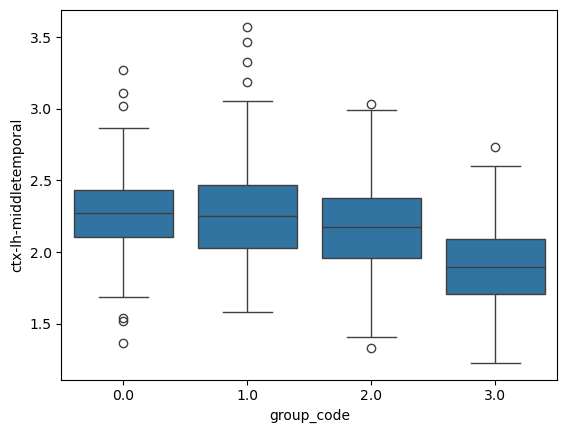

In [22]:
sns.boxplot(data=scalar_fs, x='group_code', y='ctx-lh-middletemporal')

In [21]:
scalar_fs

,Unnamed: 0,project,Individual,AltId,Other_ID,ID,TimePoint,GUID,freesurfer_6_0_0_aparc_thickness_GUID,scandate,...,ctx-rh-rostralanteriorcingulate,ctx-rh-rostralmiddlefrontal,ctx-rh-superiorfrontal,ctx-rh-superiorparietal,ctx-rh-superiortemporal,ctx-rh-supramarginal,ctx-rh-frontalpole,ctx-rh-temporalpole,ctx-rh-transversetemporal,ctx-rh-insula
0,0,ADNI,002_S_0295,295.0,I240517,52934,v06,77c43309-dce6-4780-9125-70f380442400,290c2ed0-c79b-468a-9c63-a8b27374a024,2011-06-02,...,1.832,3.158,2.600,2.623,1.986,2.472,3.874,1.143,3.208,1.546
1,1,ADNI,002_S_0413,413.0,I241475,52930,v06,225df5b2-eefa-4924-9afb-01066af57009,07a899f8-98d8-4b92-9419-bc5c6d61fe11,2011-06-16,...,1.315,3.177,2.759,3.033,2.380,2.615,3.614,1.414,3.905,1.601
2,2,ADNI,002_S_0685,685.0,I323914,52932,v11,026cea67-ec0d-4618-90c6-90f581e8f2a9,4ce6a3d7-f0cb-4022-9d40-79758b761264,2012-07-27,...,1.754,2.926,2.638,3.156,2.088,2.872,2.996,1.347,3.913,1.515
3,3,ADNI,002_S_0729,729.0,I189822,52818,m48,12dc6ba9-cd43-4076-931e-d9c9f14bad69,2cf4c520-5081-4620-9fa6-eccd463e2990,2010-07-22,...,1.788,3.646,3.235,4.057,2.600,3.333,3.592,1.793,4.308,1.835
4,5,ADNI,002_S_1261,1261.0,I363623,52922,v11,0599e2b6-5b3e-4671-9121-8675e62938a9,183b302e-570f-4de8-97a3-cc91ff5f8041,2013-02-27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1148,1333,ADNI,941_S_4377,4377.0,I285772,52912,v02,3806ef1a-bef7-4700-9de6-4958a9bd2324,0384328a-e2a9-4ee8-95b9-7119b3eee840,2012-01-04,...,1.757,3.133,2.529,2.940,2.076,2.669,3.170,1.212,3.761,1.582
1149,1334,ADNI,941_S_4420,4420.0,I297520,52922,v02,679d0a4c-3a2b-4010-93f2-e42401b0d040,8174c7d4-ce33-410f-9165-860900e22671,2012-03-28,...,1.992,3.104,3.035,2.952,2.185,2.624,3.041,1.477,4.165,1.653
1150,1335,ADNI,941_S_4764,4764.0,I315149,52932,v02,30f35ef9-5db9-4140-933e-5db1eb3cc400,1cf71cc4-cc05-4c9c-956d-fd5df6cc5e10,2012-06-01,...,1.946,3.370,3.011,3.472,2.426,2.991,3.846,1.356,4.951,1.700
1151,1336,ADNI,941_S_5124,5124.0,I373384,52918,v02,66bb0099-9336-44b0-9ca5-578f0338ee90,00d2e88a-96c1-4842-924f-d8c4fc07f3c4,2013-04-09,...,1.863,3.231,2.858,3.175,1.976,2.738,3.051,1.528,3.710,1.429
